The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Text(0.5,1,'S&P500 Weekly Closing Index')

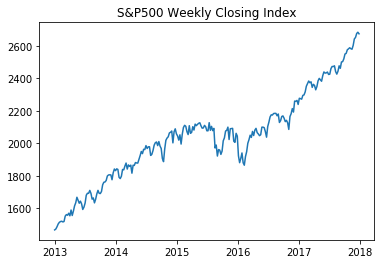

In [140]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')
%load_ext rpy2.ipython
%matplotlib inline

df = pd.read_csv('D:/data/sp500-weekly.csv', index_col = 'Date')
df.index = pd.to_datetime(df.index)
df = df.drop('Adj Close', 1)
ts = df['Close']
plt.plot(ts)
plt.title('S&P500 Weekly Closing Index')

Text(0.5,1,'Log Transformation')

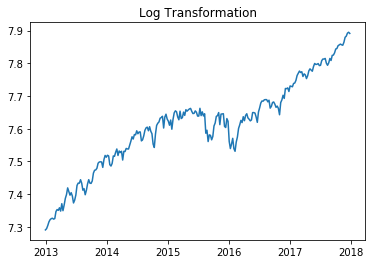

In [141]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.title("Log Transformation")

Text(0.5,1,'Log Differencing')

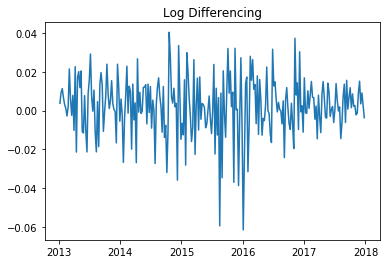

In [142]:
ts_log_diff = ts_log.diff(1)
ts_log_diff.dropna(inplace = True)
plt.plot(ts_log_diff)
plt.title("Log Differencing")

In [143]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import statsmodels


def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    rol_mean = timeSeries.rolling(window=size).mean()
    rol_weighted_mean = timeSeries.ewm(span=12,min_periods=0,
                                   adjust=True,ignore_na=False).mean()
    rol_std = timeSeries.rolling(window = size).std()


    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    rol_std.plot(color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

def draw_acf_pacf(ts, lags=31):
    plot_acf(ts, lags=lags)
    plot_pacf(ts, lags=lags)
    plt.show()

In [144]:
testStationarity(ts_log_diff)

Test Statistic                -7.856133e+00
p-value                        5.436661e-12
#Lags Used                     6.000000e+00
Number of Observations Used    2.530000e+02
Critical Value (1%)           -3.456464e+00
Critical Value (5%)           -2.873033e+00
Critical Value (10%)          -2.572895e+00
dtype: float64

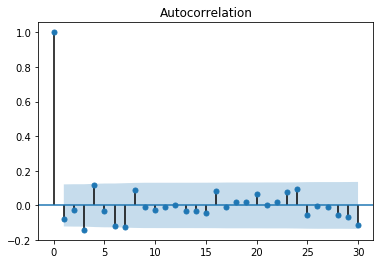

In [145]:
plot_acf(ts_log_diff, lags = 30)
plt.show()

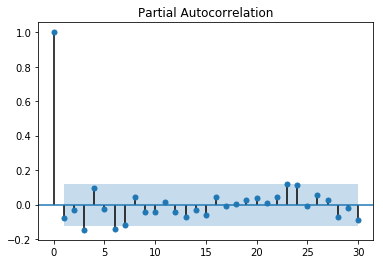

In [146]:
plot_pacf(ts_log_diff, lags = 30)
plt.show()

In [147]:
%%R -i ts_log_diff -o out
library(TSA)
library(lmtest)
out = eacf(ts_log_diff)

In [148]:
print(out)

$eacf

            [,1]        [,2]        [,3]        [,4]        [,5]        [,6]

[1,] -0.08006744 -0.02474475 -0.14148043  0.11836773 -0.03328412 -0.12169199

[2,] -0.33981528  0.01317648 -0.10335751  0.07602206 -0.03087061 -0.04114166

[3,] -0.20381940 -0.30615751 -0.12408193 -0.02908504 -0.08579507  0.02101687

[4,]  0.45899489  0.15013635 -0.27589720  0.05267593 -0.08506850 -0.07183669

[5,]  0.26172776  0.09487245 -0.22680239 -0.37779891 -0.01422365 -0.12522698

[6,] -0.18021392  0.34288836 -0.00884836 -0.34704217  0.07113087 -0.09763042

[7,] -0.49615568  0.34149677 -0.01287160 -0.39127174  0.34501613 -0.26225100

[8,]  0.32192172 -0.11565843 -0.30397696 -0.06777323 -0.14204785 -0.24573206

           [,7]        [,8]         [,9]         [,10]         [,11]

[1,] -0.1222191  0.08906983 -0.010317458 -2.841950e-02 -0.0088920030

[2,] -0.1494104  0.07472113 -0.028264516 -2.191043e-02 -0.0194831834

[3,] -0.1613245 -0.03024514 -0.060843582  5.293770e-06 -0.0059329332

[4,] -0.164

Text(0.5,1,'RSS: 0.0569')

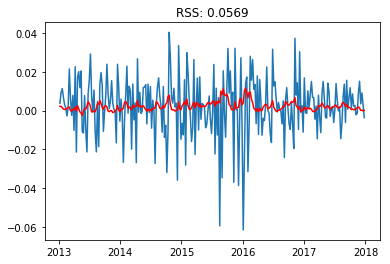

In [149]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_log_diff, order = (1,1))
result_arma = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(result_arma.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((result_arma.fittedvalues-ts_log_diff)**2))

In [150]:
print("AIC:", result_arma.aic)
print(result_arma.params)

AIC: -1445.360878227702
const          0.002251
ar.L1.Close    0.760026
ma.L1.Close   -0.862050
dtype: float64


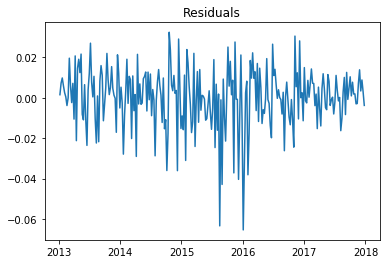

(array([  3.27910934e-04,   2.94357423e-01,   2.32382189e+00,
          7.52030706e+00,   7.54685687e+00,   1.02443500e+01,
          1.32028542e+01,   1.52983635e+01,   1.53028089e+01,
          1.54355923e+01,   1.54418400e+01,   1.54584127e+01,
          1.56117179e+01,   1.57613846e+01,   1.60539022e+01,
          1.82153047e+01,   1.82364309e+01,   1.86073237e+01,
          1.91120869e+01,   2.10825077e+01,   2.13117538e+01,
          2.18833532e+01,   2.44197409e+01,   2.76994799e+01,
          2.81085677e+01,   2.81253295e+01,   2.81267287e+01,
          2.88945298e+01,   3.01033204e+01,   3.33772532e+01,
          3.64403533e+01,   3.64588319e+01,   3.73194059e+01,
          3.75160650e+01,   3.76952956e+01,   3.81723329e+01,
          3.83965317e+01,   3.91760233e+01,   3.93230312e+01,
          3.99848793e+01]),
 array([ 0.98555245,  0.86313971,  0.50797263,  0.11081716,  0.18304104,
         0.11473193,  0.06731745,  0.0535971 ,  0.08294714,  0.11696949,
         0.1631494 ,

In [176]:
plt.plot(result_arma.resid)
test = result_arma.resid
plt.title("Residuals")
plt.show()
from statsmodels.stats.diagnostic import acorr_ljungbox as ljungbox
ljungbox(result_arma.resid)

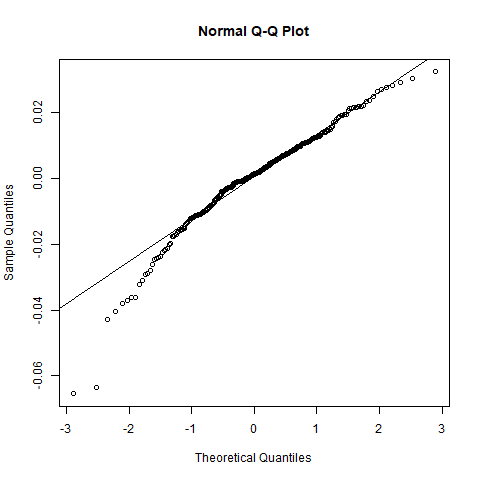

In [152]:
%%R -i test
qqnorm(test)
qqline(test)

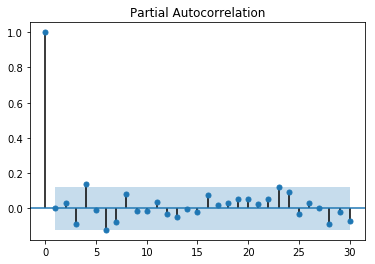

In [153]:
test = np.array(result_arma.resid)
plot_pacf(result_arma.resid, lags = 30)
plt.show()

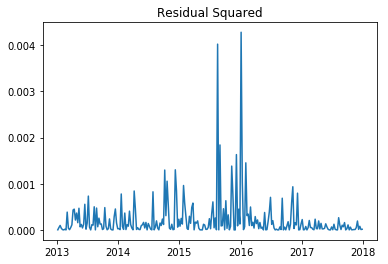

In [154]:
residual = result_arma.resid
residual_2 = residual*residual
plt.plot(residual_2)
plt.title("Residual Squared")
plt.show()

In [155]:
ljungbox(residual_2)

(array([  0.74603866,   5.18063639,   5.18595102,  24.34066182,
         25.33048539,  25.52265351,  29.71095874,  35.81025407,
         36.01528298,  36.0301249 ,  36.03382155,  38.81375131,
         39.08758874,  39.10795627,  39.62679299,  43.34869141,
         43.52362541,  46.69497006,  46.69562869,  69.3797775 ,
         69.99605451,  70.00878073,  70.06440974,  77.84153539,
         77.88890944,  77.99970343,  78.185235  ,  78.53808708,
         78.56237007,  80.11921195,  80.12297553,  80.56698048,
         81.41339789,  81.92182975,  82.57214041,  82.86919108,
         83.6227601 ,  83.68509084,  83.80549236,  83.81043829]),
 array([  3.87733318e-01,   7.49961729e-02,   1.58676420e-01,
          6.82478744e-05,   1.20281013e-04,   2.73151826e-04,
          1.07278329e-04,   1.90216129e-05,   3.93997848e-05,
          8.31785540e-05,   1.67058181e-04,   1.12932731e-04,
          1.93607270e-04,   3.50982524e-04,   5.16186684e-04,
          2.47578392e-04,   4.02467130e-04,   2.

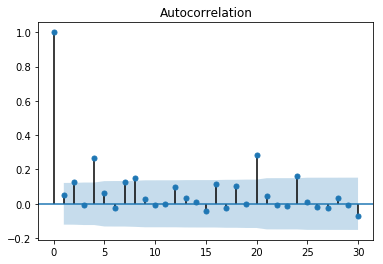

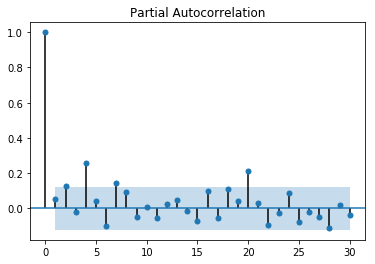

In [182]:
draw_acf_pacf(residual_2, lags = 30)
plt.show()

In [175]:
from arch import arch_model
am1 = arch_model(residual, mean = 'Zero', vol = 'ARCH', p = 4, o=0, q = 0)
res1 = am1.fit()
print(res1.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: -737.6737862057985
Iteration:      2,   Func. Count:     17,   Neg. LLF: -737.7729217223687
Iteration:      3,   Func. Count:     25,   Neg. LLF: -740.1949901808181
Iteration:      4,   Func. Count:     34,   Neg. LLF: -740.3258905389328
Iteration:      5,   Func. Count:     42,   Neg. LLF: -741.4251761077237
Iteration:      6,   Func. Count:     50,   Neg. LLF: -742.1014471859562
Iteration:      7,   Func. Count:     59,   Neg. LLF: -742.1456733653185
Iteration:      8,   Func. Count:     67,   Neg. LLF: -742.2155832351777
Iteration:      9,   Func. Count:     74,   Neg. LLF: -742.3423347764019
Iteration:     10,   Func. Count:     81,   Neg. LLF: -742.5487488094087
Iteration:     11,   Func. Count:     90,   Neg. LLF: -742.567708598309
Iteration:     12,   Func. Count:     98,   Neg. LLF: -742.6688589080173
Iteration:     13,   Func. Count:    106,   Neg. LLF: -742.7145456060925
Iteration:     14,   Func. Count:    113,   Neg. LLF

**From above we can see that the forth parameter of ARCH(4) is not significant, so we then choose ARCH(3) model.**

In [158]:
am2 = arch_model(test, mean = 'zero',vol = 'ARCH', p = 3, o=0, q = 0)
res2 = am2.fit()
print(res2.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -729.5063289835988
Iteration:      2,   Func. Count:     15,   Neg. LLF: -729.5463388673915
Iteration:      3,   Func. Count:     22,   Neg. LLF: -730.2875227655793
Iteration:      4,   Func. Count:     31,   Neg. LLF: -730.2979191150368
Iteration:      5,   Func. Count:     38,   Neg. LLF: -730.3764642145068
Iteration:      6,   Func. Count:     45,   Neg. LLF: -730.4030896527956
Iteration:      7,   Func. Count:     53,   Neg. LLF: -730.4041846736308
Iteration:      8,   Func. Count:     60,   Neg. LLF: -730.4121306759564
Iteration:      9,   Func. Count:     66,   Neg. LLF: -730.4122241931664
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -730.4122241931645
            Iterations: 9
            Function evaluations: 66
            Gradient evaluations: 9
                        Zero Mean - ARCH Model Results                        
Dep. Variable:                      y   R-squared:     

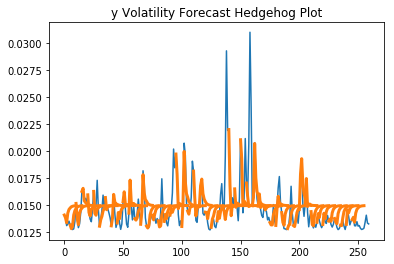

In [180]:
res2.hedgehog_plot(step = 5)#Arch(3) model simulation
plt.show()

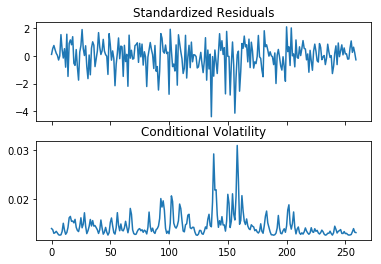

In [105]:
res2.plot()
plt.show()

**Arch model with distribution of student t**

In [177]:
am3 = arch_model(test, mean = 'zero',vol = 'ARCH', p = 4, o=0, q = 0, dist = 't')
res3 = am3.fit()
print(res3.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: -742.4020619782497
Iteration:      2,   Func. Count:     19,   Neg. LLF: -742.4236555120741
Iteration:      3,   Func. Count:     28,   Neg. LLF: -743.7342375877282
Iteration:      4,   Func. Count:     37,   Neg. LLF: -743.9722515038343
Iteration:      5,   Func. Count:     46,   Neg. LLF: -744.2314990145098
Iteration:      6,   Func. Count:     55,   Neg. LLF: -744.4477855400266
Iteration:      7,   Func. Count:     65,   Neg. LLF: -744.5038459150493
Iteration:      8,   Func. Count:     73,   Neg. LLF: -744.8461935276073
Iteration:      9,   Func. Count:     82,   Neg. LLF: -744.9098180006183
Iteration:     10,   Func. Count:     92,   Neg. LLF: -745.0166914488843
Iteration:     11,   Func. Count:    100,   Neg. LLF: -745.0293515451061
Iteration:     12,   Func. Count:    108,   Neg. LLF: -745.0300225185224
Iteration:     13,   Func. Count:    116,   Neg. LLF: -745.0300926128707
Iteration:     14,   Func. Count:    124,   Neg. LL

In [178]:
am4 = arch_model(test, mean = 'zero',vol = 'ARCH', p = 3, o=0, q = 0, dist = 't')
res4 = am4.fit()
print(res4.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: -738.4324353023517
Iteration:      2,   Func. Count:     16,   Neg. LLF: -738.6131850929623
Iteration:      3,   Func. Count:     25,   Neg. LLF: -738.649925265996
Iteration:      4,   Func. Count:     35,   Neg. LLF: -738.6505094474189
Iteration:      5,   Func. Count:     43,   Neg. LLF: -738.7265015472306
Iteration:      6,   Func. Count:     51,   Neg. LLF: -738.7518059466292
Iteration:      7,   Func. Count:     59,   Neg. LLF: -738.7640762738449
Iteration:      8,   Func. Count:     67,   Neg. LLF: -738.7793116767361
Iteration:      9,   Func. Count:     74,   Neg. LLF: -738.7845329723198
Iteration:     10,   Func. Count:     82,   Neg. LLF: -738.7859919477507
Iteration:     11,   Func. Count:     89,   Neg. LLF: -738.786380097097
Iteration:     12,   Func. Count:     96,   Neg. LLF: -738.7863811536672
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -738.7863811536666
            Iter

**There is no significant change in arch model with t distribution, so we stick with the original normal distribution.**

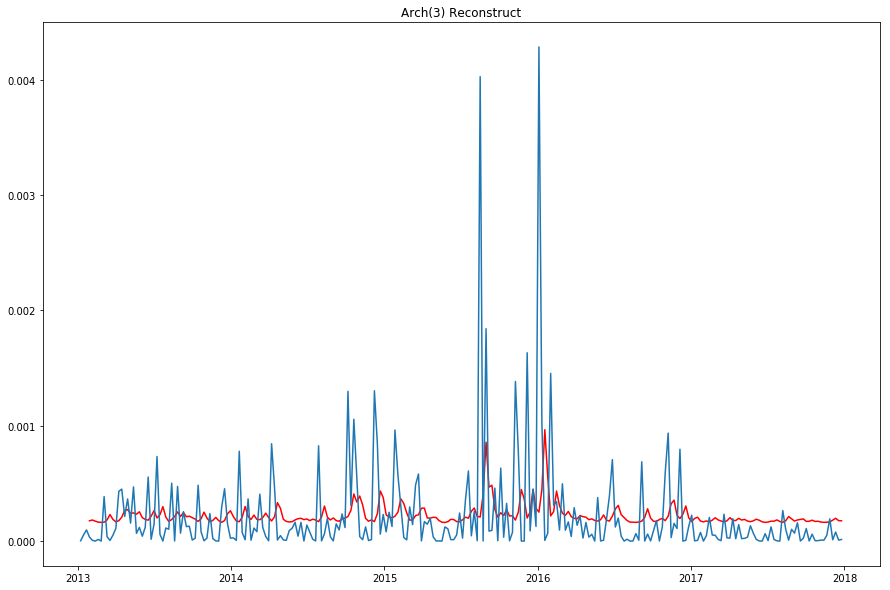

In [134]:
def fit_value(ts, params, p, q = 0):# I can not find any function to generate fitted values of arch model, so I write one myself
    result = np.ones(ts.shape[0])*params[0]
    for i in range(p):
        result = result + ts.shift(i+1)*params[p-i]
    result.dropna(inplace = True)
    return result

fit2 = fit_value(residual_2, res2.params, p=3)
fig1 = plt.figure(figsize = (15,10))
plt.plot(fit2, color = 'red')
plt.plot(residual_2)
plt.title("Arch(3) Reconstruct")
plt.show()

**Residual J-B test**

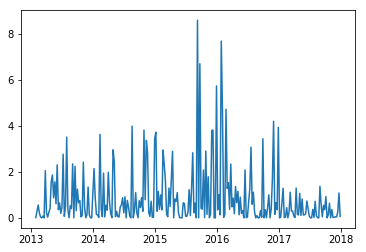

(array([  7.90436037e-03,   6.21424841e-01,   6.85462472e-01,
          1.58195885e+01,   1.79239009e+01,   1.86705062e+01,
          2.51612868e+01,   3.09600468e+01,   3.16502339e+01,
          3.16545155e+01,   3.18095333e+01,   3.33817908e+01,
          3.38573430e+01,   3.40927342e+01,   3.47846906e+01,
          3.77394802e+01,   3.77430964e+01,   3.82180858e+01,
          3.88663411e+01,   4.27522841e+01,   4.41018571e+01,
          4.48430654e+01,   4.48626517e+01,   5.41890963e+01,
          5.43321565e+01,   5.44930677e+01,   5.47201517e+01,
          5.66306709e+01,   5.73273296e+01,   6.00865044e+01,
          6.05310586e+01,   6.08052754e+01,   6.21284992e+01,
          6.22276302e+01,   6.33311696e+01,   6.33410613e+01,
          6.40661784e+01,   6.40837610e+01,   6.41260945e+01,
          6.51023718e+01]),
 array([  9.29156242e-01,   7.32924620e-01,   8.76617878e-01,
          3.27105374e-03,   3.04330554e-03,   4.75784381e-03,
          7.10422550e-04,   1.42822393e-04

In [136]:
r1 = residual_2.shift(3)
r1.dropna(inplace = True)
test1 = r1/fit2
plt.plot(test1)
plt.show()
ljungbox(test1)

**Garch modeling**

In [168]:
amg1 = arch_model(residual, mean = 'zero',vol = 'GARCH', p = 1, o=0, q = 2)
resg1 = amg1.fit()
print(resg1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -738.4185450423487
Iteration:      2,   Func. Count:     13,   Neg. LLF: -738.6332795521138
Iteration:      3,   Func. Count:     20,   Neg. LLF: -738.7029582597482
Iteration:      4,   Func. Count:     29,   Neg. LLF: -738.7030892348
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -738.7030892837187
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 4
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.004
Vol Model:                      GARCH   Log-Likelihood:                738.703
Distribution:                  Normal   AIC:                          -1469.41
Method:            Maximum Likelihood   BIC:                          -1455.16
                            

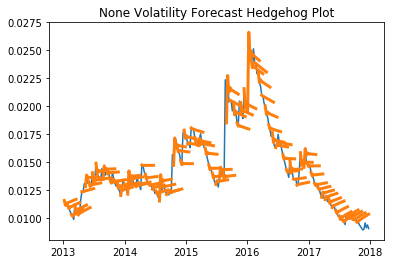

In [170]:
resg1.hedgehog_plot(step = 3)
plt.show()

In [25]:
%%R -i residual_2 -o out
library(TSA)
library(lmtest)
out = eacf(residual_2,ar.max = 7, ma.max = 6)

In [26]:
print(out)

$eacf

            [,1]        [,2]         [,3]       [,4]        [,5]         [,6]

[1,]  0.05325903  0.12959840 -0.004477812  0.2682999  0.06087117 -0.026768264

[2,] -0.35743808  0.13031241  0.001048929  0.2618294  0.14131780  0.008909422

[3,]  0.13353151 -0.35217706 -0.030628184  0.2654187  0.07633938 -0.077651083

[4,]  0.06608109 -0.39119743 -0.203982079  0.2001431 -0.11008929  0.032519700

[5,] -0.15756763  0.34337231 -0.398107428 -0.1407334 -0.09015850  0.043463743

[6,]  0.35966085  0.04187747 -0.427457242  0.1453756 -0.18541026  0.030959377

[7,]  0.46761486  0.09115237 -0.438818847 -0.3501604 -0.12278187 -0.033639919

[8,] -0.46548912  0.39722001 -0.297513944  0.1586181 -0.14569571 -0.076434078

             [,7]

[1,]  0.124721723

[2,]  0.067624889

[3,]  0.069624975

[4,]  0.016341298

[5,] -0.006123738

[6,]  0.015542384

[7,]  0.106425396

[8,]  0.221696611



$ar.max

[1] 8



$ma.ma

[1] 7



$symbol

  0   1   2   3   4   5   6  

0 "o" "x" "o" "x" "o" "o" "o"

1 "

Text(0.5,1,'RSS: 0.000053')

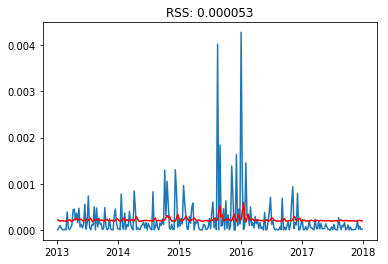

In [183]:
from statsmodels.tsa.arima_model import ARMA #I tried to use arma model to build garch model, but it seems that this model is not the same as the one generated by Arch function
model3 = ARMA(residual_2, order = (1, 2))
result3_arma = model3.fit(disp = -1)
plt.plot(residual_2)
plt.plot(result3_arma.fittedvalues, color = 'red')
plt.title('RSS: %.6f'% sum((result3_arma.fittedvalues-residual_2)**2))